In [1]:
# we can also add a different region breakdown here based on needed categorisation
# import all the necessary libraries
import pandas as pd
import numpy as np
import csv
import math
import gender_guesser.detector as gender
import nltk
import os
import pycountry
data = pd.read_csv("data_complete.csv")

In [3]:
display(data)

,Unnamed: 0,id,topic,first_author_female,subfield,abstract,year,title,X1_country,X1_gii_quartile,...,111,112,113,114,115,116,117,118,119,120
0,1,20,68,unknown,Biology,The responsiveness of South African fauna to c...,2002,Vulnerability of South African animal taxa to ...,unknown,unknown,...,0.046194,0.008732,0.009710,0.000201,0.017709,0.005965,0.000316,0.000193,0.055029,0.000935
1,2,108,78,1.0,Environmental studies & forestry,We provide a synthesis of what regional scient...,2013,The Contributions of Regional Knowledge Networ...,unknown,unknown,...,0.001455,0.005263,0.104050,0.000436,0.015238,0.000202,0.000299,0.056658,0.007871,0.000898
2,3,157,91,0.0,Environmental studies & forestry,The 'modernist' project that has come to domin...,2009,Addressing the dynamics of agri-food systems: ...,United Kingdom,1.0,...,0.001264,0.005800,0.001287,0.001152,0.002339,0.000393,0.000153,0.026729,0.044357,0.000972
3,4,195,45,1.0,Interdisciplinary,"Within modern society, business organizations ...",2011,Linking corporate climate adaptation strategie...,unknown,unknown,...,0.000759,0.004000,0.001217,0.000849,0.001968,0.001846,0.000171,0.025166,0.086968,0.000802
4,5,222,108,1.0,Engineering & technology,Human thermal comfort in urban outdoor places ...,2012,Research and design for thermal comfort in Dut...,unknown,unknown,...,0.003626,0.003280,0.000616,0.000088,0.011276,0.001012,0.000085,0.001305,0.005271,0.000403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42543,42544,5495065,35,1.0,Interdisciplinary,Boreal caribou require large areas of undistur...,2022,Protecting boreal caribou habitat can help con...,Canada,1.0,...,0.001327,0.005281,0.011815,0.000295,0.005756,0.000600,0.000072,0.000230,0.012297,0.001424
42544,42545,5496103,4,0.0,Biology,"Bali, Indonesia sits within the coral triangle...",2022,Coral reef conservation in Bali in light of in...,United Kingdom,1.0,...,0.000993,0.009694,0.001487,0.000069,0.003664,0.000684,0.000184,0.001643,0.003126,0.001173
42545,42546,5496272,65,0.0,Interdisciplinary,Global energy systems must be restructured to ...,2022,Does nuclear energy consumption contribute to ...,China,2.0,...,0.009756,0.002556,0.000986,0.003219,0.001960,0.000444,0.000035,0.004977,0.004677,0.000351
42546,42547,5541192,7,unknown,Biology,The harsh climatic conditions of deserts may l...,2022,Genomic Investigation of Desert Streptomyces h...,China,2.0,...,0.000698,0.004689,0.001414,0.000018,0.007425,0.024964,0.000636,0.000487,0.003910,0.000499


In [2]:
agg_dict = {col: ['sum','mean'] for col in [str(i) for i in range(1, 121)]}
agg_dict['climatejusticescore'] = ['sum','mean']

In [3]:
data1 = data.groupby("X1_region").agg(agg_dict)

In [5]:
display(data1)

1                    2            \
                                  sum      mean        sum      mean   
X1_region                                                              
East Asia & Pacific         51.631005  0.005551  12.129911  0.001304   
Europe & Central Asia       15.012510  0.001090  20.725536  0.001505   
Latin America & Caribbean    0.438481  0.000256  18.054818  0.010558   
Middle East & North Africa   0.335923  0.000353   1.557262  0.001636   
North America                5.258101  0.000560  20.878283  0.002224   
South Asia                   0.283704  0.000164   2.235565  0.001294   
Sub-Saharan Africa           0.298093  0.000160   2.307223  0.001236   
Unknown                      8.310739  0.002170   7.706905  0.002012   

                                    3                    4            \
                                  sum      mean        sum      mean   
X1_region                                                              
East Asia & Pacific         17.683166  0.001901  33.663034  0.003619   
Europe & Central Asia       33.523899  0.002434  23.071503  0.001675   
Latin America & Caribbean    9.923821  0.005803   5.132663  0.003002   
Middle East & North Africa   1.735158  0.001823   2.749729  0.002888   
North America               77.300607  0.008234  30.776700  0.003278   
South Asia                   1.531818  0.000886   3.838224  0.002221   
Sub-Saharan Africa           1.895619  0.001016   1.729575  0.000927   
Unknown                     10.624108  0.002774   4.629162  0.001209   

                                     5            ...        117            \
                                   sum      mean  ...        sum      mean   
X1_region                                         ...                        
East Asia & Pacific          80.677793  0.008674  ...  99.203796  0.010666   
Europe & Central Asia       114.584408  0.008319  ...  52.487907  0.003811   
Latin America & Caribbean     8.284854  0.004845  ...   7.614471  0.004453   
Middle East & North Africa    5.549240  0.005829  ...   6.652267  0.006988   
North America                58.152401  0.006194  ...  41.068183  0.004375   
South Asia                   16.179747  0.009363  ...  10.728693  0.006209   
Sub-Saharan Africa           10.709315  0.005739  ...   7.770476  0.004164   
Unknown                      25.275483  0.006599  ...  16.624422  0.004341   

                                  118                   119            \
                                  sum      mean         sum      mean   
X1_region                                                               
East Asia & Pacific         53.864135  0.005791  134.034688  0.014411   
Europe & Central Asia       89.305267  0.006484  239.764645  0.017408   
Latin America & Caribbean   11.172402  0.006534   21.610726  0.012638   
Middle East & North Africa   4.660092  0.004895    7.260618  0.007627   
North America               67.680710  0.007209  198.961271  0.021193   
South Asia                   7.391418  0.004277   18.087592  0.010467   
Sub-Saharan Africa          10.245057  0.005490   27.304000  0.014632   
Unknown                     31.335036  0.008181   97.777519  0.025529   

                                  120           climatejusticescore            
                                  sum      mean                 sum      mean  
X1_region                                                                      
East Asia & Pacific          9.663562  0.001039         1306.645268  0.140484  
Europe & Central Asia       18.163481  0.001319         2224.632528  0.161521  
Latin America & Caribbean    2.225030  0.001301          224.090662  0.131047  
Middle East & North Africa   0.922365  0.000969           91.998478  0.096637  
North America               11.241254  0.001197         1559.076293  0.166071  
South Asia                   1.835726  0.001062          284.741025  0.164781  
Sub-Saharan Africa           1.618088  0.000867          376.307577

In [39]:
# identify most and least mentioned topics in each region
# drop inconsequential, irrelevant or place-related topics

inconseq_topics = [1,2,7,11,14,16,24,30,43,48,51,63,64,65,66,73,75,77,78,92,96,99,100,103,108,114,120]
inconseq_columns = [str(topic) for topic in inconseq_topics]
inconseq_columns = [(topic, level) for topic in inconseq_columns for level in ['sum', 'mean']]


region_data_filtered = data1.drop(inconseq_columns, axis=1)

In [45]:
#data1 = data1.drop("climatejusticescore",axis=1)

def get_top_and_bottom_topics(region_data, n=5):
    most_represented_topics = region_data.loc[:, 'mean'].sort_values(ascending=False).head(n)
    least_represented_topics = region_data.loc[:, 'mean'].sort_values(ascending=True).head(n)
    return most_represented_topics, least_represented_topics

result_df = pd.DataFrame(columns=['Region', 'Most Represented Topics', 'Least Represented Topics'])

for region in region_data_filtered.index:
    region_data = region_data_filtered.loc[region]
    most_represented, least_represented = get_top_and_bottom_topics(region_data)
    most_represented_indices = most_represented.index.tolist()
    most_represented_values = most_represented.tolist()
    least_represented_indices = least_represented.index.tolist()
    least_represented_values = least_represented.tolist()
    result_df = result_df.append({
        'Region': region,
        'Most Represented Topics': most_represented_indices,
        'Least Represented Topics': least_represented_indices,
        'Most Represented Topic Scores': most_represented_values,
        'Least Represented Topic Scores': least_represented_values
    }, ignore_index=True)

# am i duplicating Anne's work? by having this map? how do these findings relate to his?
# this has funny structure - right it into a csv

                       Region Most Represented Topics  \
0         East Asia & Pacific   [85, 94, 115, 37, 54]   
1       Europe & Central Asia  [85, 91, 109, 107, 37]   
2   Latin America & Caribbean     [85, 93, 6, 68, 54]   
3  Middle East & North Africa    [6, 85, 31, 54, 115]   
4               North America  [85, 91, 37, 107, 109]   
5                  South Asia    [85, 31, 25, 34, 83]   
6          Sub-Saharan Africa    [34, 85, 83, 37, 31]   
7                     Unknown  [85, 91, 109, 37, 119]   

  Least Represented Topics                     Least Represented Topic Scores  \
0      [52, 3, 62, 28, 26]  [0.0012790598643274138, 0.0019012113131173845,...   
1       [62, 4, 71, 3, 52]  [0.001268667576985157, 0.0016751254561732376, ...   
2     [62, 104, 95, 28, 4]  [0.0023121047489378893, 0.0026826892122724637,...   
3      [56, 62, 3, 84, 52]  [0.0015599746270146993, 0.001651393650756785, ...   
4    [62, 52, 105, 71, 56]  [0.0010280383064292318, 0.0020573331004631974,...   


In [48]:
display(result_df)
result_df.to_csv("regions_topics.csv")

,Region,Most Represented Topics,Least Represented Topics,Least Represented Topic Scores,Most Represented Topic Scores
0,East Asia & Pacific,"[85, 94, 115, 37, 54]","[52, 3, 62, 28, 26]","[0.0012790598643274138, 0.0019012113131173845,...","[0.029919918965273615, 0.025302538289279666, 0..."
1,Europe & Central Asia,"[85, 91, 109, 107, 37]","[62, 4, 71, 3, 52]","[0.001268667576985157, 0.0016751254561732376, ...","[0.03281065592334675, 0.028149835940147142, 0...."
2,Latin America & Caribbean,"[85, 93, 6, 68, 54]","[62, 104, 95, 28, 4]","[0.0023121047489378893, 0.0026826892122724637,...","[0.030612969080297005, 0.01972489074216009, 0...."
3,Middle East & North Africa,"[6, 85, 31, 54, 115]","[56, 62, 3, 84, 52]","[0.0015599746270146993, 0.001651393650756785, ...","[0.03308693724258378, 0.029831000776194626, 0...."
4,North America,"[85, 91, 37, 107, 109]","[62, 52, 105, 71, 56]","[0.0010280383064292318, 0.0020573331004631974,...","[0.03217953297769784, 0.02529804332072385, 0.0..."
5,South Asia,"[85, 31, 25, 34, 83]","[3, 56, 95, 4, 41]","[0.0008864687592095798, 0.0011992914221140058,...","[0.033014387424207946, 0.029991591004537497, 0..."
6,Sub-Saharan Africa,"[34, 85, 83, 37, 31]","[4, 3, 56, 82, 62]","[0.0009268889980385716, 0.0010158731888778405,...","[0.060128663877778675, 0.04168575216602268, 0...."
7,Unknown,"[85, 91, 109, 37, 119]","[4, 52, 38, 28, 36]","[0.001208658382117554, 0.001516660283647339, 0...","[0.03697369260913829, 0.03677735961916654, 0.0..."


In [16]:
cj_topics = ["12","21","25","37","44","50","56","80","83","91","101","118","119"]
subset_columns = cj_topics + ["climatejusticescore"]
data_cj = data1.loc[:, subset_columns]

In [18]:
mean_columns = [col for col in data_cj.columns if col[1] == 'mean']
data_cj_mean = data_cj[mean_columns]
data_cj_mean.to_csv("data_cj_mean.csv")

In [32]:
import seaborn as sns
import wesanderson as wa

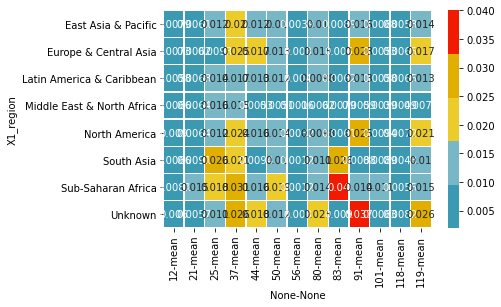

In [37]:
sns.heatmap(data_cj_mean.iloc[:, :-1],annot=True,linewidth=.5, cmap=wa.film_palette('aquatic'), vmin=0.002, vmax=0.04)
# match back to topic names
# normalise by column 
# normalise by row

In [39]:
sum_columns = [col for col in data_cj.columns if col[1] == 'sum']
data_cj_sum = data_cj[sum_columns]
data_cj_sum.to_csv("data_cj_sum.csv")

## Extract location from title/abstract

In [ ]:
data['text'] = data.apply(lambda x: x['title'] + " " + x['abstract'], axis=1)

In [ ]:
# dailed to set up the environment for mordecai here - working on the mcc server

In [23]:
! pip install mordecai3

     |████████████████████████████████| 4.0 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 7.7 MB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.7 MB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 179 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 135.4 MB 16.4 MB/s eta 0:00:01
     |████████████████████████████████| 385 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 858 kB 16.5 MB/s eta 0:00:01
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
     |████████████████████████████████| 50 kB 14.0 MB/s eta 0:00:01
  Using cached srsly-2.4.8-cp38-cp38-macosx_10_9_x86_64.whl (490 kB)
     |████████████████████████████████| 312 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 16.2 MB/s eta 0:00:01


     |████████████████████████████████| 404 kB 16.4 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 16.4 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 11.0 MB/s eta 0:00:01
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.1
    Uninstalling catalogue-2.0.1:
      Successfully uninstalled catalogue-2.0.1
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.0
    Uninstalling srsly-2.4.0:
      Successfully uninstalled srsly-2.4.0
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninstalling thinc-7.4.6:
      Successfully uninstalled thinc-7.4.6
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.9
    Uninstalling spacy-2.3.9:
      Successfully uninstalled spacy-2.3.9
  Attempting uninstall: elasticsearch
    Found existing installation: elasticsearch 5.4.0
    Uninstalling elasticse

In [ ]:
from mordecai3 import Geoparser

In [6]:
! pip install astroid==2.5.2

     |████████████████████████████████| 222 kB 4.4 MB/s eta 0:00:01
  Attempting uninstall: astroid
    Found existing installation: astroid 2.5
    Uninstalling astroid-2.5:
      Successfully uninstalled astroid-2.5


In [10]:
! pip install spacy==2.3

     |████████████████████████████████| 10.2 MB 162 kB/s eta 0:00:01    |██████████████████████████████▉ | 9.8 MB 162 kB/s eta 0:00:03
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached srsly-1.0.7-cp38-cp38-macosx_10_9_x86_64.whl (367 kB)
     |████████████████████████████████| 3.7 MB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 17.3 MB/s eta 0:00:01
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.8
    Uninstalling srsly-2.4.8:
      Successfully uninstalled srsly-2.4.8
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.10
    Uninstalling catalogue-2.0.10:
      Successfully uninstalled catalogue-2.0.10
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.1
    Uninstalling thinc-8.2.1:
      Successfully uninstalled 

In [1]:
geo = Geoparser()

NameError: name 'Geoparser' is not defined

In [2]:
geo.geoparse_doc.loc[0,'text']

NameError: name 'geo' is not defined

In [11]:
! pip check mordecai3

weasel 0.3.2 has requirement srsly<3.0.0,>=2.4.3, but you have srsly 1.0.7.
spacy-transformers 1.3.1 has requirement spacy<4.0.0,>=3.5.0, but you have spacy 2.3.0.
spacy-transformers 1.3.1 has requirement srsly<3.0.0,>=2.4.0, but you have srsly 1.0.7.
mordecai3 3.0.0a0 has requirement elasticsearch<8.0,>=7.11.0, but you have elasticsearch 5.4.0.
mordecai3 3.0.0a0 has requirement elasticsearch-dsl<8.0,>=7.3.0, but you have elasticsearch-dsl 5.3.0.
mordecai3 3.0.0a0 has requirement spacy<4.0,>=3.5, but you have spacy 2.3.0.
confection 0.1.3 has requirement srsly<3.0.0,>=2.4.0, but you have srsly 1.0.7.
